<a href="https://colab.research.google.com/github/ethankyle360/ML4SupplyChain/blob/main/section_8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1 - Make a new script and call it section 8 assignment.

In [3]:
#2 - Import twentyeleven.csv, iris, cars and the requested packages.

import pandas as pd
import seaborn as sns

twenty= pd.read_csv('twentyeleven.csv')
cars= pd.read_csv('cars.csv')
iris= pd.read_csv('iris.csv')

twenty.info()
twenty['InvoiceDate']= pd.to_datetime(twenty['InvoiceDate'])
twenty['date']= twenty['InvoiceDate'].dt.strftime('%Y-%m-%d')
twenty['date']= pd.to_datetime(twenty['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


<Axes: xlabel='date'>

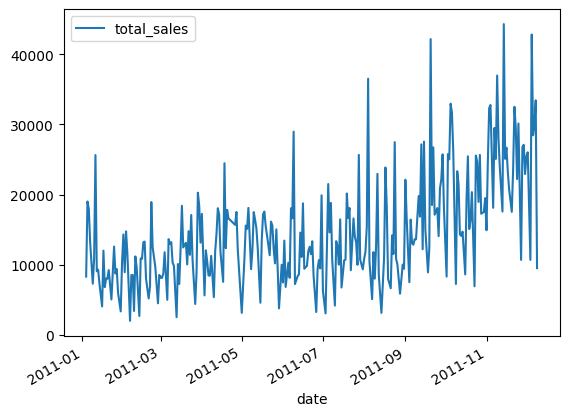

In [4]:
#3 - Make a new line plot of the sales of 2011 for the United Kingdom.

twenty= twenty[twenty.Country== 'United Kingdom']

sales_per_day= twenty.groupby('date').agg(total_sales=('Quantity', 'sum'))

sales_per_day.plot()

array([<Axes: xlabel='date'>], dtype=object)

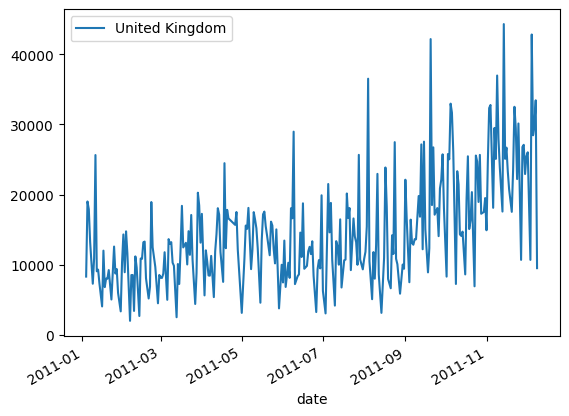

In [5]:
#4 - For the next plot; select country countries<-e("Canada", "Denmark", "EIRE", "United Kingdom")

countries=["Canada", "Denmark", "EIRE", "United Kingdom"]
four_countries= twenty[twenty.Country.isin(countries)]

sales_per_Day= four_countries.groupby(['Country','date']).agg(total_sales=('Quantity','sum')).reset_index()

sales_pivoted= pd.pivot_table(sales_per_Day,values='total_sales',
                              columns='Country',index='date',fill_value=0)

sales_pivoted.plot(subplots=True)

<Axes: xlabel='Price', ylabel='horsepower'>

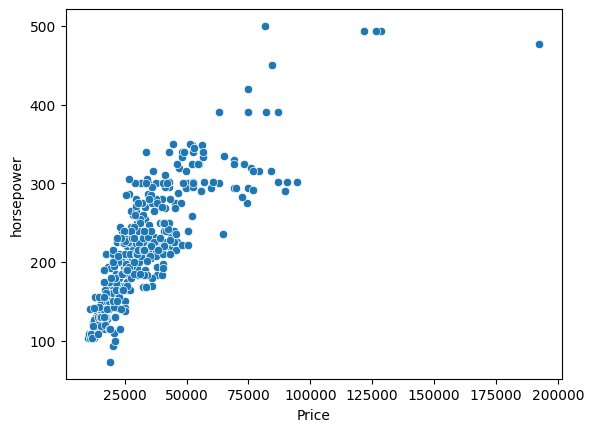

In [6]:
#5 - Make a scatter plot for cars between price and horsepower.

sns.scatterplot(x= 'Price',y='horsepower',data=cars)

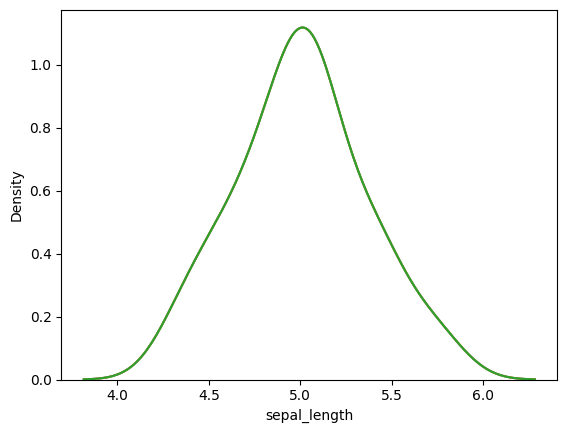

In [7]:
#6 - Make a distribution plot of sepal length in iris and segregate it by flower.

setosa= iris[iris.species=='setosa']
virginica= iris[iris.species=='virginica']
versicolor= iris[iris.species== 'versicolor']

fig=sns.kdeplot(setosa.sepal_length,label='setosa')
fig=sns.kdeplot(setosa.sepal_length,label='virginica')
fig=sns.kdeplot(setosa.sepal_length,label='versicolor')

<Axes: xlabel='cylenders', ylabel='horsepower'>

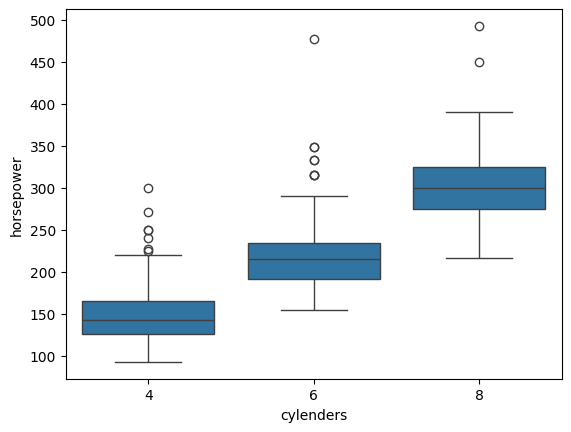

In [10]:
#7 - Make a boxplot for the number of cylinders of cars, make sure to take only 4,6 and 8 cylinders and horsepower.

common_cylenders= cars[cars.cylenders.isin([4,6,8])]

sns.boxplot(x='cylenders',y='horsepower',data=common_cylenders)

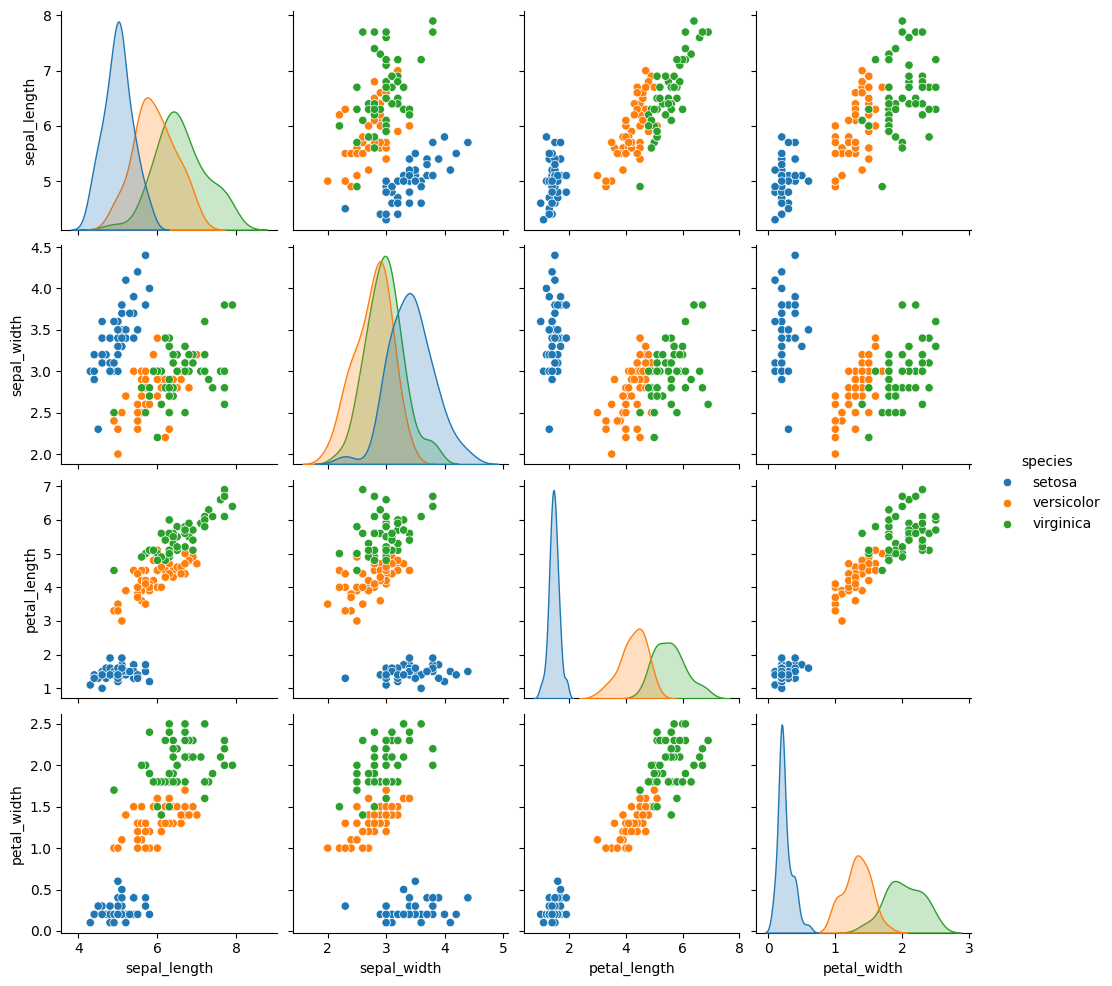

In [11]:
#8 - Make a pair plot or iris dataset segregated by flower type.

sns.pairplot(iris,hue='species')